In [1]:
import pandas as pd

data_file_path = 'D:/location/dataset_biontek.xlsx'

bio_data = pd.read_excel(data_file_path)

#Material drop Material column
data = bio_data.drop(['Material', 'CellDensity', 'Literature', 'CelllineUsed'], axis = 1)
data.head(5)

print(data.columns)
columns = data.columns

print(type(columns))

columns = columns.tolist()
print(type(columns))

data.dropna(inplace=True)

#Data Plotting Before Scaling
import matplotlib.pyplot as plt
data.plot(kind = 'bar')


from sklearn import preprocessing
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns = columns)

#Data Plotting After Scaling
data.plot(kind = 'bar')

Y = data['Printability']
Z = data['CellViability']

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import time
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


data.to_csv('D:/partahabhai/bntk.csv', index=False)


Score=0.0
Coef=0.0 
Intercept=0.0
all_results = []

X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.30, random_state = 150)


#Number of independent Variable
k=len(columns)

#Number of observations
n=len(X_test)

Index(['A', 'C', 'M', 'TN', 'IV', 'SolidContent', 'Crosslinker', 'Pressure',
       'PrintSpeed', 'n', 'Viscosity', 'LossTangent', 'NozzleSize',
       'ChangeFilamentWidth', 'DiffusionRate', 'CollapseFactor',
       'Printability', 'SwellingRate', 'CellViability', 'IncubationDay'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
<class 'list'>


In [2]:
#k- Number of independent Variable
#n- Number of samples
def LRegression(Regressor, k, n):
    
    regression = {}
    
    if (Regressor == 'LinearRegression'):
        
        reg = LinearRegression().fit(X_train, y_train)        
        prediction = reg.predict(X_test)            
        Score = reg.score(X_train, y_train)
        Coef  = reg.coef_
        Intercept = reg.intercept_
        
        #Mean Absolute Error(MAE)
        LMAE = mean_absolute_error(y_test,prediction)
    
        #Mean Squared Error(MSE)
        LMSE = mean_squared_error(y_test,prediction)
    
        #Root Mean Squared Error(RMSE)
        LRMSE = np.sqrt(mean_squared_error(y_test,prediction))
    
        #Root Mean Squared Log Error(RMSLE)
        LLGRMSE = np.log(np.sqrt(mean_squared_error(y_test,prediction)))
    
        #R Squared (R2)
        LRSQRD = r2_score(y_test,prediction)
        n=len(X_test)
        #Number of independent Variable
        k=len(columns)
    
        #Adjusted R Squared
        LARSQRD = 1 - ((1-LRSQRD)*(n-1)/(n-k-1))
        
        
        regression['Regressor']=Regressor
        regression['Mean_Absolute_Error']=LMAE
        regression['Mean_Squared_Error']=LMSE
        regression['Root_Mean_Squared_Error']= LRMSE
        regression['Root_Mean_Squared_Log_Error']=LLGRMSE
        regression['R_Squared']= LRSQRD
        regression['Adjusted_R_Squared']= LARSQRD
        regression['Prediction']= prediction
        
        
        return regression
        
        
def RandomFRegression(Regressor,k,n):
    
    regression = {}
    
    if (Regressor == 'RandomForestRegressor'):
        
        reg = RandomForestRegressor(max_depth=10, n_estimators = 50, random_state=22)
        reg.fit(X_train, y_train)
        prediction = reg.predict(X_test)    
        
        
        #Mean Absolute Error(MAE)
        LMAE = mean_absolute_error(y_test,prediction)
    
        #Mean Squared Error(MSE)
        LMSE = mean_squared_error(y_test,prediction)
    
        #Root Mean Squared Error(RMSE)
        LRMSE = np.sqrt(mean_squared_error(y_test,prediction))
    
        #Root Mean Squared Log Error(RMSLE)
        LLGRMSE = np.log(np.sqrt(mean_squared_error(y_test,prediction)))
    
        #R Squared (R2)
        LRSQRD = r2_score(y_test,prediction)
        n=len(X_test)
        #Number of independent Variable
        k=len(columns)
    
        #Adjusted R Squared
        LARSQRD = 1 - ((1-LRSQRD)*(n-1)/(n-k-1))
        
        regression['Regressor']=Regressor
        regression['Mean_Absolute_Error']=LMAE
        regression['Mean_Squared_Error']=LMSE
        regression['Root_Mean_Squared_Error']= LRMSE
        regression['Root_Mean_Squared_Log_Error']=LLGRMSE
        regression['R_Squared']= LRSQRD
        regression['Adjusted_R_Squared']= LARSQRD
        regression['Prediction']= prediction
        
        
        return regression 

def KNRegressor(Regressor,k,n):
    
    regression = {}
    
    if (Regressor == 'KNeighborsRegressor'):
        
        reg = KNeighborsRegressor(n_neighbors=3)
        reg.fit(X_train, y_train)
        prediction = reg.predict(X_test)    
        
        
        #Mean Absolute Error(MAE)
        LMAE = mean_absolute_error(y_test,prediction)
    
        #Mean Squared Error(MSE)
        LMSE = mean_squared_error(y_test,prediction)
    
        #Root Mean Squared Error(RMSE)
        LRMSE = np.sqrt(mean_squared_error(y_test,prediction))
    
        #Root Mean Squared Log Error(RMSLE)
        LLGRMSE = np.log(np.sqrt(mean_squared_error(y_test,prediction)))
    
        #R Squared (R2)
        LRSQRD = r2_score(y_test,prediction)
        n=len(X_test)
        #Number of independent Variable
        k=len(columns)
    
        #Adjusted R Squared
        LARSQRD = 1 - ((1-LRSQRD)*(n-1)/(n-k-1))
        
        regression['Regressor']=Regressor
        regression['Mean_Absolute_Error']=LMAE
        regression['Mean_Squared_Error']=LMSE
        regression['Root_Mean_Squared_Error']= LRMSE
        regression['Root_Mean_Squared_Log_Error']=LLGRMSE
        regression['R_Squared']= LRSQRD
        regression['Adjusted_R_Squared']= LARSQRD
        regression['Prediction']= prediction
        
        return regression
                

def SRegressor(Regressor, k, n):
    
    regression = {}
    
    if (Regressor == 'SVMRegressor'):

        regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        regr.fit(X_train, y_train)
        prediction = regr.predict(X_test)
        
        
        #Mean Absolute Error(MAE)
        LMAE = mean_absolute_error(y_test,prediction)
    
        #Mean Squared Error(MSE)
        LMSE = mean_squared_error(y_test,prediction)
    
        #Root Mean Squared Error(RMSE)
        LRMSE = np.sqrt(mean_squared_error(y_test,prediction))
    
        #Root Mean Squared Log Error(RMSLE)
        LLGRMSE = np.log(np.sqrt(mean_squared_error(y_test,prediction)))
    
        #R Squared (R2)
        LRSQRD = r2_score(y_test,prediction)
        n=len(X_test)
        #Number of independent Variable
        k=len(columns)
    
        #Adjusted R Squared
        LARSQRD = 1 - ((1-LRSQRD)*(n-1)/(n-k-1))
        
        regression['Regressor']=Regressor
        regression['Mean_Absolute_Error']=LMAE
        regression['Mean_Squared_Error']=LMSE
        regression['Root_Mean_Squared_Error']= LRMSE
        regression['Root_Mean_Squared_Log_Error']=LLGRMSE
        regression['R_Squared']= LRSQRD
        regression['Adjusted_R_Squared']= LARSQRD
        regression['Prediction']= prediction
        
        
        return regression

In [3]:
def Ridge_Regression(Regressor,k,n):
    
    regression = {}
    
    if (Regressor == 'Ridge_Regression'):
        
        reg = Ridge(alpha=0.05, normalize=True)        
        reg.fit(X_train, y_train)
        prediction = reg.predict(X_test)    
        
        
        #Mean Absolute Error(MAE)
        LMAE = mean_absolute_error(y_test,prediction)
    
        #Mean Squared Error(MSE)
        LMSE = mean_squared_error(y_test,prediction)
    
        #Root Mean Squared Error(RMSE)
        LRMSE = np.sqrt(mean_squared_error(y_test,prediction))
    
        #Root Mean Squared Log Error(RMSLE)
        LLGRMSE = np.log(np.sqrt(mean_squared_error(y_test,prediction)))
    
        #R Squared (R2)
        LRSQRD = r2_score(y_test,prediction)
        n=len(X_test)
        #Number of independent Variable
        k=len(columns)
    
        #Adjusted R Squared
        LARSQRD = 1 - ((1-LRSQRD)*(n-1)/(n-k-1))
        
        regression['Regressor']=Regressor
        regression['Mean_Absolute_Error']=LMAE
        regression['Mean_Squared_Error']=LMSE
        regression['Root_Mean_Squared_Error']= LRMSE
        regression['Root_Mean_Squared_Log_Error']=LLGRMSE
        regression['R_Squared']= LRSQRD
        regression['Adjusted_R_Squared']= LARSQRD
        regression['Prediction']= prediction
        
        return regression

In [4]:
def Lasso_Regression(Regressor,k,n):
    
    regression = {}
    
    if (Regressor == 'Lasso_Regression'):
        
        reg = Lasso(alpha=0.3, normalize=True)        
        reg.fit(X_train, y_train)
        prediction = reg.predict(X_test)    
        
        
        #Mean Absolute Error(MAE)
        LMAE = mean_absolute_error(y_test,prediction)
    
        #Mean Squared Error(MSE)
        LMSE = mean_squared_error(y_test,prediction)
    
        #Root Mean Squared Error(RMSE)
        LRMSE = np.sqrt(mean_squared_error(y_test,prediction))
    
        #Root Mean Squared Log Error(RMSLE)
        LLGRMSE = np.log(np.sqrt(mean_squared_error(y_test,prediction)))
    
        #R Squared (R2)
        LRSQRD = r2_score(y_test,prediction)
        n=len(X_test)
        #Number of independent Variable
        k=len(columns)
    
        #Adjusted R Squared
        LARSQRD = 1 - ((1-LRSQRD)*(n-1)/(n-k-1))
        
        regression['Regressor']=Regressor
        regression['Mean_Absolute_Error']=LMAE
        regression['Mean_Squared_Error']=LMSE
        regression['Root_Mean_Squared_Error']= LRMSE
        regression['Root_Mean_Squared_Log_Error']=LLGRMSE
        regression['R_Squared']= LRSQRD
        regression['Adjusted_R_Squared']= LARSQRD
        regression['Prediction']= prediction
        
        return regression
                


In [5]:
def ElasticNet_Regression(Regressor,k,n):
    
    regression = {}
    
    if (Regressor == 'ElasticNet_Regression'):
        
        reg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)        
        reg.fit(X_train, y_train)
        prediction = reg.predict(X_test)    
        
        
        #Mean Absolute Error(MAE)
        LMAE = mean_absolute_error(y_test,prediction)
    
        #Mean Squared Error(MSE)
        LMSE = mean_squared_error(y_test,prediction)
    
        #Root Mean Squared Error(RMSE)
        LRMSE = np.sqrt(mean_squared_error(y_test,prediction))
    
        #Root Mean Squared Log Error(RMSLE)
        LLGRMSE = np.log(np.sqrt(mean_squared_error(y_test,prediction)))
    
        #R Squared (R2)
        LRSQRD = r2_score(y_test,prediction)
        n=len(X_test)
        #Number of independent Variable
        k=len(columns)
    
        #Adjusted R Squared
        LARSQRD = 1 - ((1-LRSQRD)*(n-1)/(n-k-1))
        
        regression['Regressor']=Regressor
        regression['Mean_Absolute_Error']=LMAE
        regression['Mean_Squared_Error']=LMSE
        regression['Root_Mean_Squared_Error']= LRMSE
        regression['Root_Mean_Squared_Log_Error']=LLGRMSE
        regression['R_Squared']= LRSQRD
        regression['Adjusted_R_Squared']= LARSQRD
        regression['Prediction']= prediction
        
        return regression
                


In [6]:
import pandas as pd
from collections import OrderedDict
from datetime import date

Text(0.5, 1.0, 'LinearRegression-Printability')

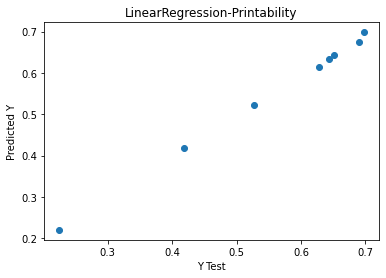

In [7]:
result = LRegression('LinearRegression',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('LinearRegression-Printability')

Text(0.5, 1.0, 'RandomForestRegressor-Printability')

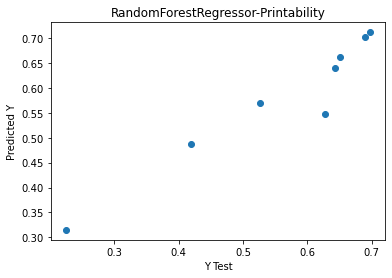

In [8]:
result = RandomFRegression('RandomForestRegressor',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('RandomForestRegressor-Printability')

Text(0.5, 1.0, 'KNeighborsRegressor-Printability')

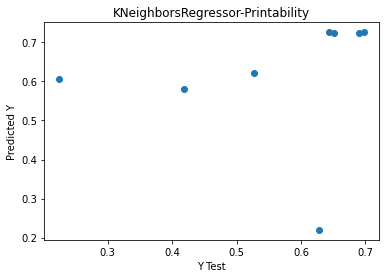

In [9]:
result = KNRegressor('KNeighborsRegressor',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('KNeighborsRegressor-Printability')

Text(0.5, 1.0, 'SVMRegressor-Printability')

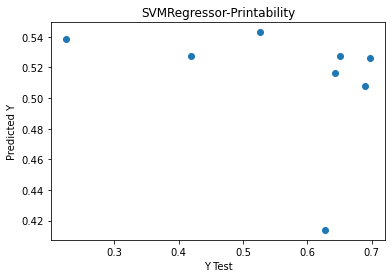

In [10]:
result = SRegressor('SVMRegressor',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('SVMRegressor-Printability')

Text(0.5, 1.0, 'Ridge_Regression-Printability')

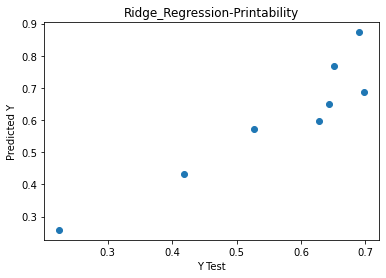

In [11]:
result = Ridge_Regression('Ridge_Regression',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Ridge_Regression-Printability')

Text(0.5, 1.0, 'Lasso_Regression-Printability')

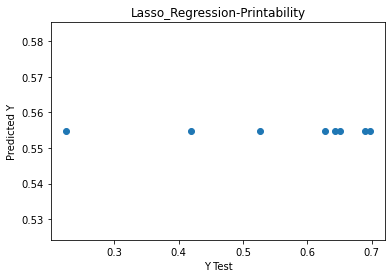

In [12]:
result = Lasso_Regression('Lasso_Regression',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Lasso_Regression-Printability')

Text(0.5, 1.0, 'ElasticNet_Regression-Printability')

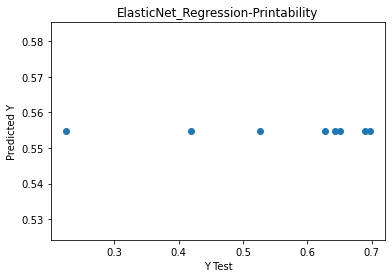

In [13]:
result = ElasticNet_Regression('ElasticNet_Regression',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('ElasticNet_Regression-Printability')

In [14]:
regression_dataframe_printability = pd.DataFrame(all_results)
regression_dataframe_printability

,Regressor,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error,Root_Mean_Squared_Log_Error,R_Squared,Adjusted_R_Squared,Prediction
0,LinearRegression,0.006988,0.000074,0.008605,-4.755428,0.996868,1.001686,"[0.6984464236101241, 0.22003166961912649, 0.52..."
1,RandomForestRegressor,0.040174,0.002704,0.052004,-2.956443,0.885615,1.061592,"[0.7117829457364344, 0.31488372093023254, 0.57..."
2,KNeighborsRegressor,0.158269,0.045323,0.212892,-1.546969,-0.917006,2.032234,"[0.7260981912144703, 0.607235142118863, 0.6227..."
3,SVMRegressor,0.157017,0.031259,0.176801,-1.732732,-0.322123,1.711912,"[0.5263087978509376, 0.5382777462780506, 0.542..."
4,Ridge_Regression,0.055466,0.006476,0.080476,-2.519794,0.726071,1.147500,"[0.6860855963043387, 0.25849880855338797, 0.57..."
5,Lasso_Regression,0.128755,0.023671,0.153854,-1.871751,-0.001201,1.539108,"[0.5547480620155039, 0.5547480620155039, 0.554..."
6,ElasticNet_Regression,0.128755,0.023671,0.153854,-1.871751,-0.001201,1.539108,"[0.5547480620155039, 0.5547480620155039, 0.554..."


In [15]:
Score=0.0
Coef=0.0 
Intercept=0.0
all_results = []

X_train, X_test, y_train, y_test = train_test_split(data, Z, test_size=0.30, random_state = 150)

In [16]:
#Number of independent Variable
k=len(columns)

#Number of observations
n=len(X_test)

#k- Number of independent Variable
#n- Number of samples

Text(0.5, 1.0, 'LinearRegression-CellViability')

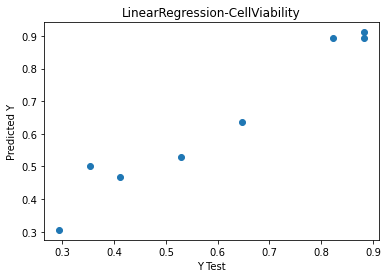

In [17]:
result = LRegression('LinearRegression',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('LinearRegression-CellViability')

Text(0.5, 1.0, 'RandomForestRegressor-CellViability')

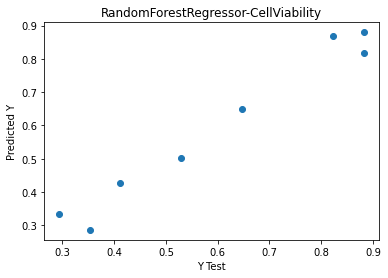

In [18]:
result = RandomFRegression('RandomForestRegressor',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('RandomForestRegressor-CellViability')

Text(0.5, 1.0, 'KNeighborsRegressor-CellViability')

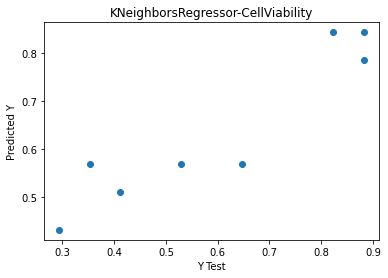

In [19]:
result = KNRegressor('KNeighborsRegressor',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('KNeighborsRegressor-CellViability')

Text(0.5, 1.0, 'SVMRegressor-CellViability')

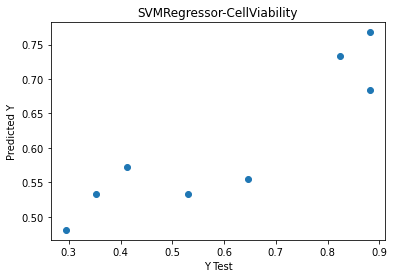

In [20]:
result = SRegressor('SVMRegressor',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('SVMRegressor-CellViability')

Text(0.5, 1.0, 'Ridge_Regression-CellViability')

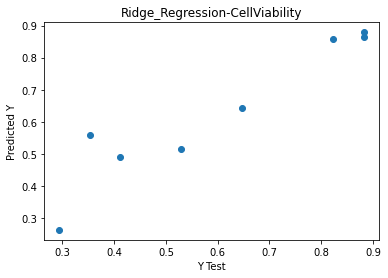

In [21]:
result = Ridge_Regression('Ridge_Regression',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Ridge_Regression-CellViability')

Text(0.5, 1.0, 'Lasso_Regression-CellViability')

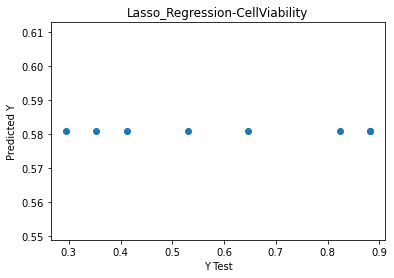

In [22]:
result = Lasso_Regression('Lasso_Regression',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Lasso_Regression-CellViability')

Text(0.5, 1.0, 'ElasticNet_Regression-CellViability')

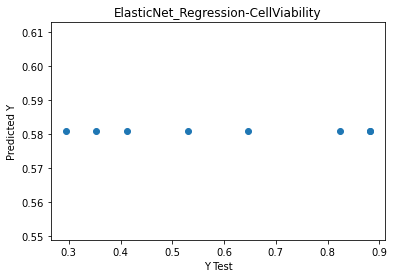

In [23]:
result = ElasticNet_Regression('ElasticNet_Regression',k,n)
all_results.append(result)
plt.scatter(y_test,result['Prediction'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('ElasticNet_Regression-CellViability')

In [24]:
regression_dataframe_cellViability = pd.DataFrame(all_results)
regression_dataframe_cellViability

,Regressor,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error,Root_Mean_Squared_Log_Error,R_Squared,Adjusted_R_Squared,Prediction
0,LinearRegression,0.042291,0.003934,0.062719,-2.769086,0.922598,1.041678,"[0.8925801478835019, 0.30560711381021466, 0.46..."
1,RandomForestRegressor,0.032794,0.001646,0.040573,-3.204645,0.967609,1.017442,"[0.8799999999999994, 0.3341176470588231, 0.427..."
2,KNeighborsRegressor,0.090686,0.011774,0.108510,-2.220917,0.768322,1.124750,"[0.8431372549019605, 0.4313725490196075, 0.509..."
3,SVMRegressor,0.128485,0.020341,0.142622,-1.947556,0.599756,1.215516,"[0.7680310878604858, 0.48085100908433553, 0.57..."
4,Ridge_Regression,0.048873,0.006473,0.080457,-2.520038,0.872628,1.068585,"[0.8791739134732892, 0.26332560216769896, 0.49..."
5,Lasso_Regression,0.205882,0.051308,0.226514,-1.484950,-0.009574,1.543617,"[0.5808823529411762, 0.5808823529411762, 0.580..."
6,ElasticNet_Regression,0.205882,0.051308,0.226514,-1.484950,-0.009574,1.543617,"[0.5808823529411762, 0.5808823529411762, 0.580..."
